In [47]:
import pandas as pd

In [48]:
df=pd.read_csv('/content/fashion_products (1).csv')

In [49]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [50]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [52]:
df.nunique()

User ID          100
Product ID      1000
Product Name       5
Brand              5
Category           3
Price             91
Rating          1000
Color              6
Size               4
dtype: int64

In [53]:
df.isnull().sum()


User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [54]:
pip install matplotlib seaborn pandas


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

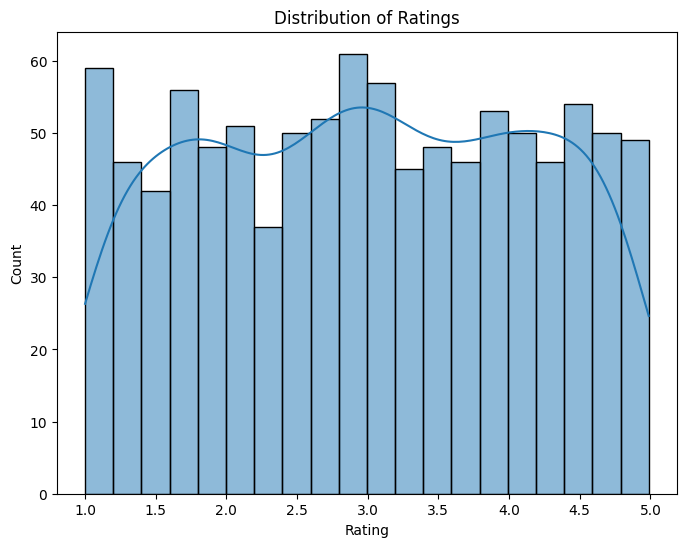

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

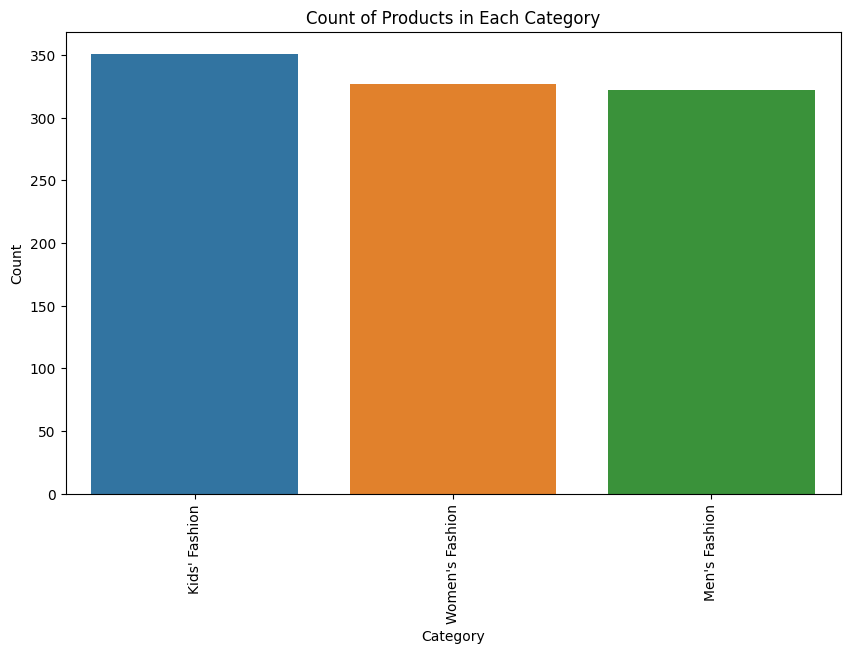

In [57]:
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Count of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

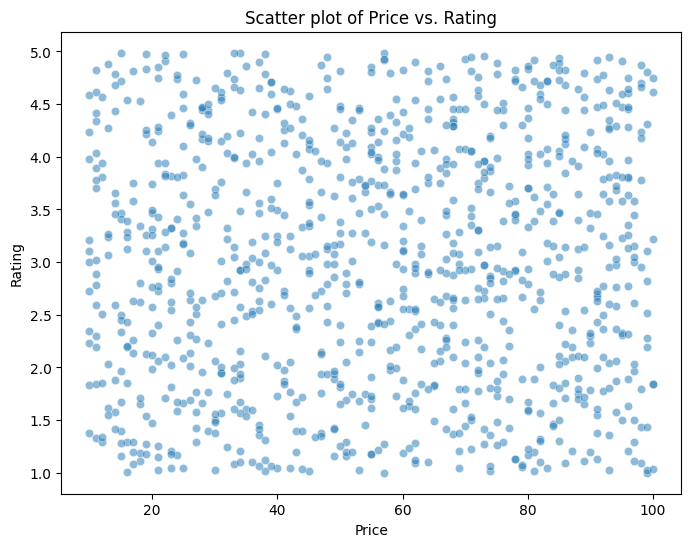

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Rating', alpha=0.5)
plt.title('Scatter plot of Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

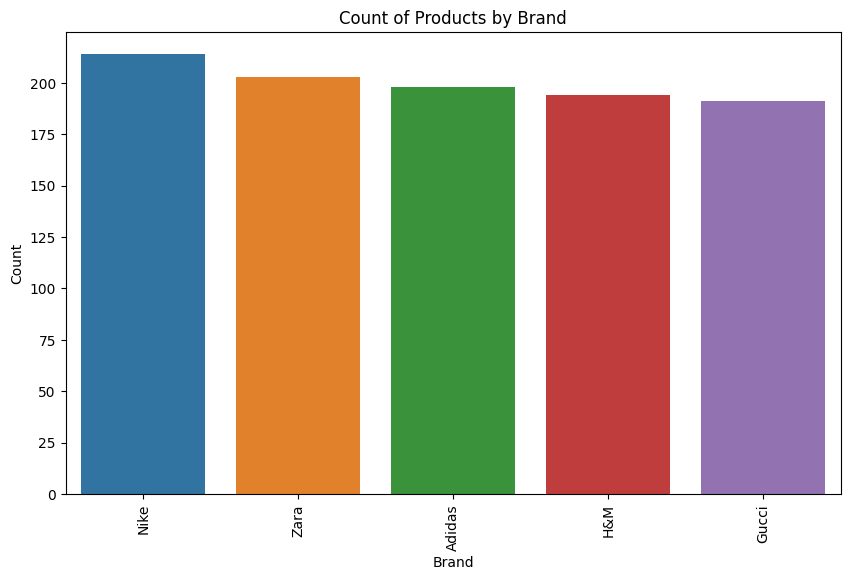

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
plt.title('Count of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

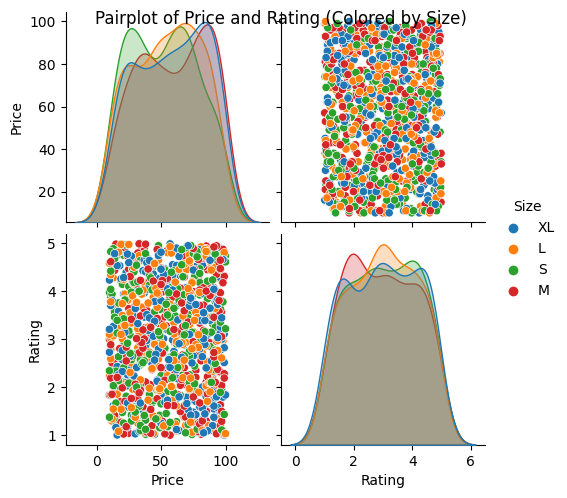

In [60]:
sns.pairplot(data=df, vars=['Price', 'Rating'], hue='Size')
plt.suptitle('Pairplot of Price and Rating (Colored by Size)')
plt.show()

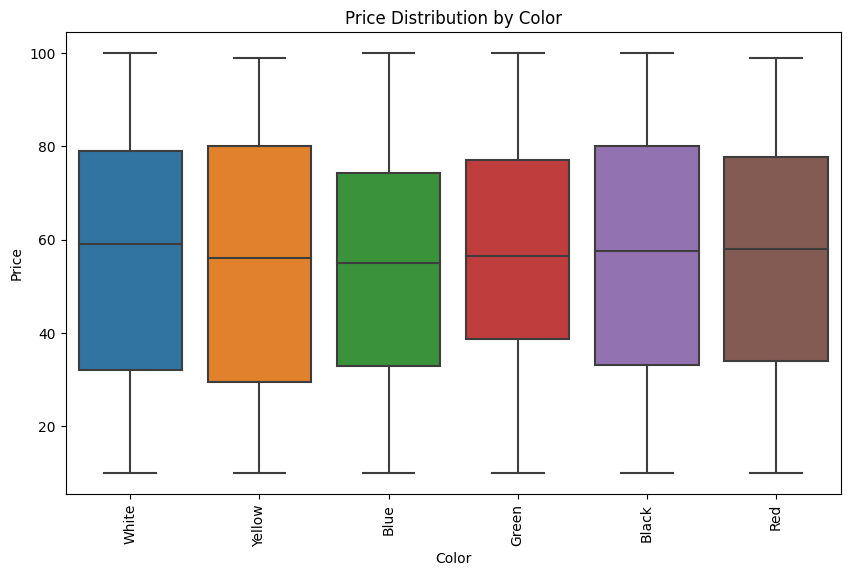

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Color', y='Price', order=df['Color'].value_counts().index)
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

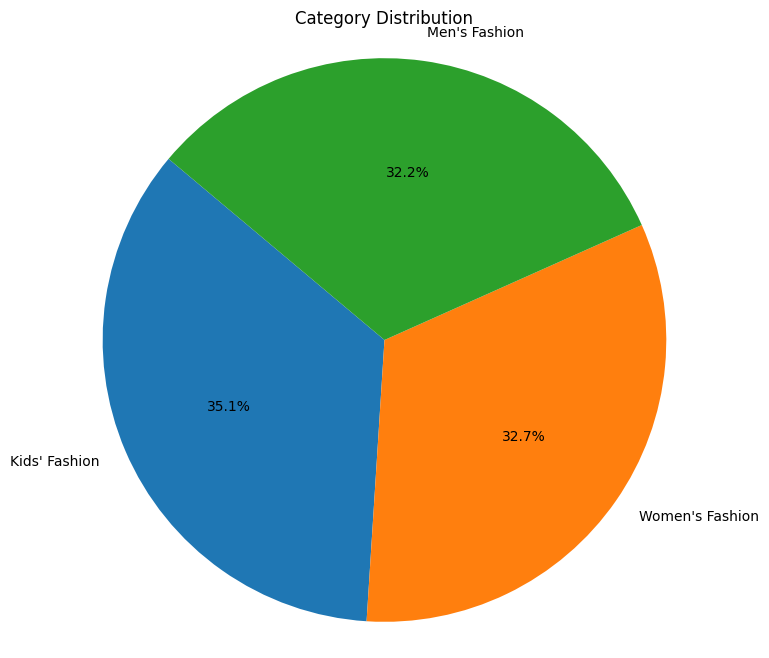

In [62]:
plt.figure(figsize=(8, 8))
category_counts = df['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

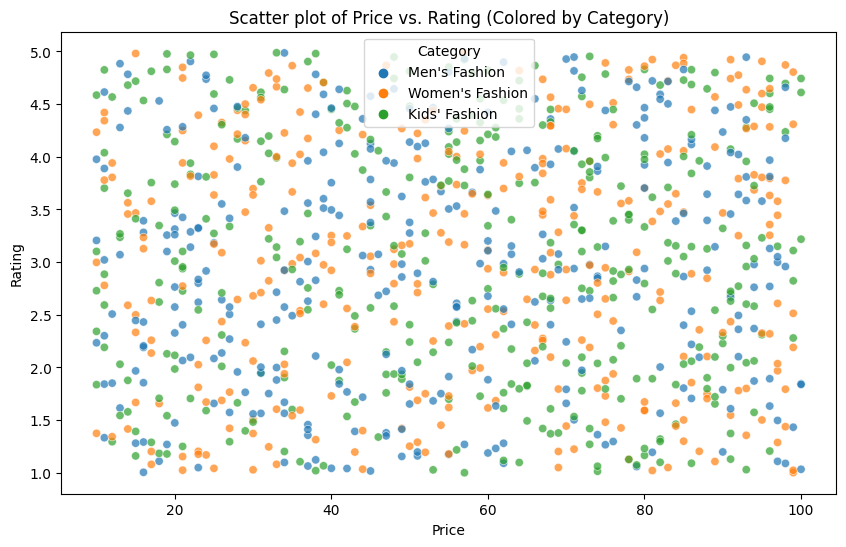

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Category', alpha=0.7)
plt.title('Scatter plot of Price vs. Rating (Colored by Category)')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

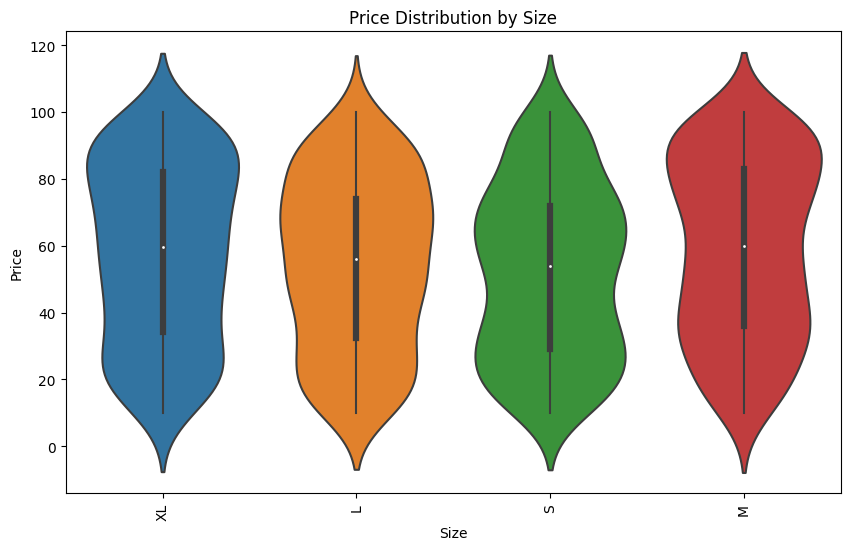

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Size', y='Price', order=df['Size'].value_counts().index)
plt.title('Price Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [65]:
pip install scikit-surprise


In [66]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User ID', 'Product ID', 'Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)


model = SVD()
model.fit(trainset)


try:
    userID = int(input("Enter a User ID to get recommendations for: "))
except ValueError:
    print("Please enter a valid User ID.")
    exit()



if userID not in df['User ID'].unique():
    print("User ID not found in the dataset.")
else:
    user_items = df[df['User ID'] == userID][['Product ID', 'Product Name', 'Size']]
    unseen_items = list(set(df['Product ID']) - set(user_items['Product ID']))

    predictions = [model.predict(userID, item) for item in unseen_items]


    N = 10
    top_N_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:N]


    print(f"Top {N} Recommendations for User ID {userID}:")
    for idx, recommendation in enumerate(top_N_recommendations, start=1):
        product_info = df[df['Product ID'] == recommendation.iid][['Product Name', 'Size']].iloc[0]
        print(f"{idx}. {product_info['Product Name']}, {product_info['Size']}")



Enter a User ID to get recommendations for: 16
Top 10 Recommendations for User ID 16:
1. Dress, XL
2. Shoes, S
3. Dress, M
4. Sweater, M
5. T-shirt, L
6. Sweater, L
7. Shoes, L
8. Shoes, L
9. Shoes, S
10. Sweater, XL


In [67]:
from surprise import accuracy


predictions = model.test(testset)


rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


mae = accuracy.mae(predictions)
print(f"MAE: {mae}")


RMSE: 1.1688
RMSE: 1.1687801044656154
MAE:  1.0045
MAE: 1.0044645578368618


In [68]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User ID', 'Product ID', 'Rating']], reader)


trainset, testset = train_test_split(data, test_size=0.2)


model = KNNBasic(sim_options={'user_based': True})


model.fit(trainset)


try:
    user_id = int(input("Enter a User ID to get recommendations for: "))
except ValueError:
    print("Please enter a valid User ID.")
    exit()


user_items = df[df['User ID'] == user_id]['Product ID']
unseen_items = list(set(df['Product ID']) - set(user_items))


user_predictions = [model.predict(user_id, item) for item in unseen_items]


N = 10
top_N_recommendations = sorted(user_predictions, key=lambda x: x.est, reverse=True)[:N]


print(f"Top {N} Recommendations for User ID {user_id}:")
for idx, recommendation in enumerate(top_N_recommendations, start=1):
    print(f"{idx}. Product ID: {recommendation.iid}, Estimated Rating: {recommendation.est}")


Computing the msd similarity matrix...
Done computing similarity matrix.
Enter a User ID to get recommendations for: 23
Top 10 Recommendations for User ID 23:
1. Product ID: 1, Estimated Rating: 3.0081666248966803
2. Product ID: 2, Estimated Rating: 3.0081666248966803
3. Product ID: 3, Estimated Rating: 3.0081666248966803
4. Product ID: 4, Estimated Rating: 3.0081666248966803
5. Product ID: 5, Estimated Rating: 3.0081666248966803
6. Product ID: 6, Estimated Rating: 3.0081666248966803
7. Product ID: 7, Estimated Rating: 3.0081666248966803
8. Product ID: 8, Estimated Rating: 3.0081666248966803
9. Product ID: 9, Estimated Rating: 3.0081666248966803
10. Product ID: 10, Estimated Rating: 3.0081666248966803


In [69]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User ID', 'Product ID', 'Rating']], reader)


trainset, testset = train_test_split(data, test_size=0.2)


model = KNNBasic(sim_options={'user_based': True})


model.fit(trainset)


try:
    user_id = int(input("Enter a User ID to get recommendations for: "))
except ValueError:
    print("Please enter a valid User ID.")
    exit()


user_items = df[df['User ID'] == user_id]['Product ID']
unseen_items = list(set(df['Product ID']) - set(user_items))


user_predictions = [model.predict(user_id, item) for item in unseen_items]


N = 10
top_N_recommendations = sorted(user_predictions, key=lambda x: x.est, reverse=True)[:N]


print(f"Top {N} Recommendations for User ID {user_id}:")
for idx, recommendation in enumerate(top_N_recommendations, start=1):
    product_info = df[df['Product ID'] == recommendation.iid][['Product Name', 'Size']].iloc[0]
    print(f"{idx}.  {product_info['Product Name']}, {product_info['Size']}")


Computing the msd similarity matrix...
Done computing similarity matrix.
Enter a User ID to get recommendations for: 24
Top 10 Recommendations for User ID 24:
1.  Dress, XL
2.  Shoes, L
3.  Dress, XL
4.  Shoes, S
5.  T-shirt, M
6.  Dress, L
7.  Jeans, XL
8.  Sweater, XL
9.  Sweater, XL
10.  T-shirt, XL


In [70]:
from surprise import accuracy


predictions = model.test(testset)


rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


mae = accuracy.mae(predictions)
print(f"MAE: {mae}")


RMSE: 1.1097
RMSE: 1.1097411484989443
MAE:  0.9456
MAE: 0.9455683314595096


In [72]:
data = pd.read_csv('/content/fashion_products (1).csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


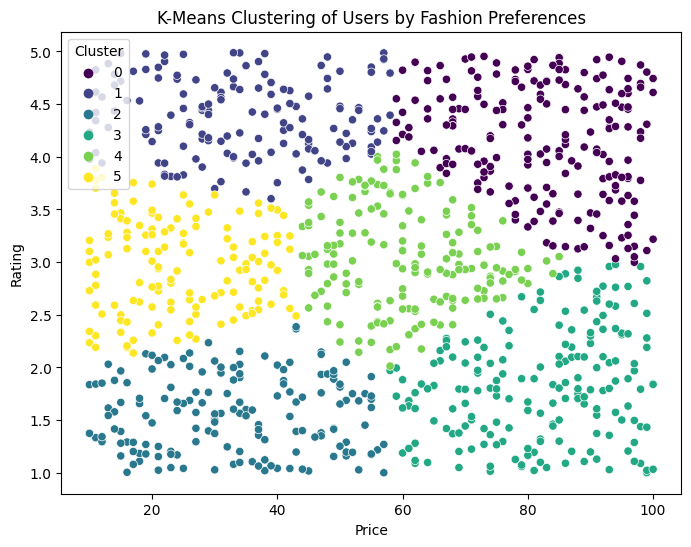

           Rating      Price
Cluster                     
0        4.141548  82.325000
1        4.383809  34.100671
2        1.569667  33.284810
3        1.837364  81.903743
4        3.039795  60.863905
5        2.965826  24.656934


In [73]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




features_for_clustering = ['Price', 'Rating']

# Perform feature scaling if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_for_clustering])

# Determine the number of clusters
num_clusters = 6

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of Users by Fashion Preferences')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Analyze cluster characteristics (e.g., average ratings, prices)
cluster_characteristics = data.groupby('Cluster')[['Rating', 'Price']].mean()
print(cluster_characteristics)


In [74]:
# You can perform user segmentation based on clustering results or other criteria
# For example, segment users based on their rating behavior
high_rated_users = data[data['Rating'] >= 4.0]
low_rated_users = data[data['Rating'] < 4.0]


low_rated_users
high_rated_users

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size,Cluster
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L,0
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M,0
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL,0
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL,1
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL,1
...,...,...,...,...,...,...,...,...,...,...
990,60,991,Shoes,Nike,Kids' Fashion,25,4.972677,Red,L,1
991,42,992,T-shirt,Gucci,Women's Fashion,91,4.922173,Black,M,0
992,89,993,Shoes,H&M,Women's Fashion,33,4.000542,Yellow,S,1
993,59,994,Sweater,H&M,Men's Fashion,89,4.440833,Green,L,0
